In [1]:
import pandas as pd

folder_path = '/Users/shilinzhang/Desktop/Brazilian E-Commerce Public Dataset/'


# Load each CSV file into a DataFrame
customers = pd.read_csv(folder_path + 'olist_customers_dataset.csv')
orders = pd.read_csv(folder_path + 'olist_orders_dataset.csv')
order_items = pd.read_csv(folder_path + 'olist_order_items_dataset.csv')
products = pd.read_csv(folder_path + 'olist_products_dataset.csv')
payments = pd.read_csv(folder_path + 'olist_order_payments_dataset.csv')

data_files=[customers, orders, order_items, products, payments]
dataframes = {}

## This part, I should check the data first to see which colume I can use to merge the data set instead of just merging it.

# Merge orders with customers using 'customer_id'
orders_with_customers = pd.merge(orders, customers, on='customer_id')

# Merge the result with order items using 'order_id'
orders_complete = pd.merge(orders_with_customers, order_items, on='order_id')

# Merge with product details using 'product_id'
orders_final = pd.merge(orders_complete, products, on='product_id')

# Merge with payment details using 'order_id'
orders_with_payments = pd.merge(orders_final, payments, on='order_id')

# I would like to clean the data in the same format


In [2]:
#This function is to determine common attribute between a data set.
def check_common_attribute(dataset_one, dataset_two):
    common_columns_customers_orders = set(dataset_one.columns).intersection(set(dataset_two.columns))
    print("Common columns between 'customers' and 'orders':", common_columns_customers_orders)
    return common_columns_customers_orders
    

In [3]:
# To check the common attribute between customers and order data set
check_common_attribute(customers, orders)

Common columns between 'customers' and 'orders': {'customer_id'}


{'customer_id'}

In [4]:
# The common attribute is customer_id between cusomters and order. Hence, merge the dataset with the field customer_id
orders_with_customer_id = pd.merge(orders, customers, on='customer_id')

In [5]:
# To check the common attribute between orders_with_customers and order data set
check_common_attribute(orders_with_customer_id, order_items)

Common columns between 'customers' and 'orders': {'order_id'}


{'order_id'}

In [6]:
# The common attribute is customer_id between cusomters and order. Hence, merge the dataset with the field customer_id
orders_complete = pd.merge(orders_with_customers, order_items, on='order_id')

In [7]:
# To check the common attribute between orders_with_customers and order data set
check_common_attribute(orders_complete, products)

Common columns between 'customers' and 'orders': {'product_id'}


{'product_id'}

In [8]:
# The common attribute is customer_id between cusomters and order. Hence, merge the dataset with the field customer_id
orders_complete_with_product_id = pd.merge(orders_complete, products, on='product_id')

In [9]:
# To check the common attribute between orders_with_customers and order data set
check_common_attribute(orders_complete_with_product_id, payments)

Common columns between 'customers' and 'orders': {'order_id'}


{'order_id'}

In [10]:
# The common attribute is customer_id between cusomters and order. Hence, merge the dataset with the field customer_id
orders_final = pd.merge(orders_complete_with_product_id, payments, on='order_id')

In [11]:
print(orders_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   customer_id                    117601 non-null  object 
 2   order_status                   117601 non-null  object 
 3   order_purchase_timestamp       117601 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   116356 non-null  object 
 6   order_delivered_customer_date  115034 non-null  object 
 7   order_estimated_delivery_date  117601 non-null  object 
 8   customer_unique_id             117601 non-null  object 
 9   customer_zip_code_prefix       117601 non-null  int64  
 10  customer_city                  117601 non-null  object 
 11  customer_state                 117601 non-null  object 
 12  order_item_id                 

In [12]:
# Dropping rows with missing values
orders_final_na_removed = orders_final.dropna()

In [13]:
# Check how many rows were removed from the original data
orders_final_na_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113390 entries, 0 to 117600
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113390 non-null  object 
 1   customer_id                    113390 non-null  object 
 2   order_status                   113390 non-null  object 
 3   order_purchase_timestamp       113390 non-null  object 
 4   order_approved_at              113390 non-null  object 
 5   order_delivered_carrier_date   113390 non-null  object 
 6   order_delivered_customer_date  113390 non-null  object 
 7   order_estimated_delivery_date  113390 non-null  object 
 8   customer_unique_id             113390 non-null  object 
 9   customer_zip_code_prefix       113390 non-null  int64  
 10  customer_city                  113390 non-null  object 
 11  customer_state                 113390 non-null  object 
 12  order_item_id                  1133

In [14]:
date_columns = [
    'order_purchase_timestamp', 'order_approved_at', 
    'order_delivered_carrier_date', 'order_delivered_customer_date', 
    'order_estimated_delivery_date', 'shipping_limit_date'
]
# Create a copy of the DataFrame to avoid the warning
orders_final_na_removed = orders_final_na_removed.copy()


for col in date_columns:
    orders_final_na_removed[col] = pd.to_datetime(orders_final_na_removed[col], errors='coerce')




In [15]:
print(orders_final_na_removed)

                                order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
117596  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
117597  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
117598  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117599  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117600  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_a

In [16]:
#Correct misspelled attributes
orders_final_na_removed = orders_final_na_removed.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
})

In [17]:
print(orders_final_na_removed)
orders_final_na_removed.to_csv(folder_path + 'cleaned_ecommerce_data_clean_final.csv', index=False)

                                order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
117596  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
117597  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
117598  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117599  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117600  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_a

In [18]:
cleaned_df = orders_final_na_removed.copy()

In [19]:
basic_stats = cleaned_df[['price', 'freight_value', 'payment_value']].describe().round(2)


In [20]:
print(basic_stats)

           price  freight_value  payment_value
count  113390.00      113390.00      113390.00
mean      120.18          20.02         172.24
std       182.76          15.75         266.60
min         0.85           0.00           0.00
25%        39.90          13.08          61.00
50%        74.90          16.32         108.14
75%       133.73          21.20         189.37
max      6735.00         409.68       13664.08


In [21]:
payment_type_counts = cleaned_df['payment_type'].value_counts()
product_category_counts = cleaned_df['product_category_name'].value_counts()
order_status_counts = cleaned_df['order_status'].value_counts()

In [22]:
# Check Top 35 category for localization
product_category_counts = cleaned_df['product_category_name'].value_counts().head(35)

In [23]:
#Translate top 25 category
category_mapping = {
    'cama_mesa_banho': 'bed_bath_table',
    'beleza_saude': 'beauty_health',
    'esporte_lazer': 'sports_leisure',
    'moveis_decoracao': 'furniture_decor',
    'informatica_acessorios': 'computers_accessories',
    'brinquedos': 'toys',
    'automotivo': 'automotive',
    'relogios_presentes': 'watches_gifts',
    'telefonia': 'telephony',
    'bebes': 'baby',
    'utilidades_domesticas': 'home_utilities',
    'malas_acessorios': 'luggage_accessories',
    'perfumaria': 'perfumery',
    'alimentos_bebidas': 'food_beverages',
    'bebidas': 'beverages',
    'construcao_ferramentas_construcao': 'construction_tools',
    'cool_stuff': 'cool_stuff',
    'consoles_games': 'consoles_games',
    'moveis_escritorio': 'office_furniture',
    'construcao_ferramentas_ferramentas': 'tools',
    'fashion_calcados': 'fashion_shoes',
    'telefonia_fixa': 'landline_phones',
    'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
    'papelaria': 'stationery',
    'eletrodomesticos': 'home_appliances',
}

cleaned_df['product_category_name'] = cleaned_df['product_category_name'].map(category_mapping).fillna(cleaned_df['product_category_name'])

product_category_counts = cleaned_df['product_category_name'].value_counts()
print(product_category_counts.head(25))


product_category_name
bed_bath_table              11649
beauty_health                9761
sports_leisure               8731
furniture_decor              8553
computers_accessories        7897
home_utilities               7172
watches_gifts                6063
telephony                    4601
ferramentas_jardim           4463
automotive                   4283
toys                         4185
cool_stuff                   3904
perfumery                    3480
baby                         3111
eletronicos                  2807
stationery                   2564
fashion_bags_accessories     2106
pet_shop                     2005
office_furniture             1753
luggage_accessories          1148
consoles_games               1139
construction_tools            938
home_appliances               771
instrumentos_musicais         688
eletroportateis               679
Name: count, dtype: int64


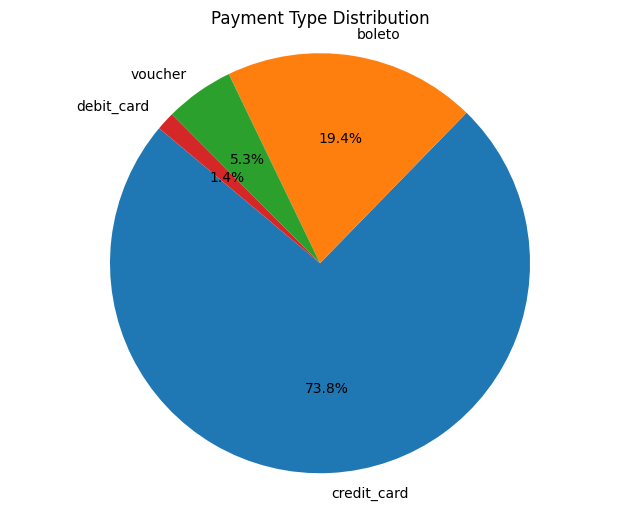

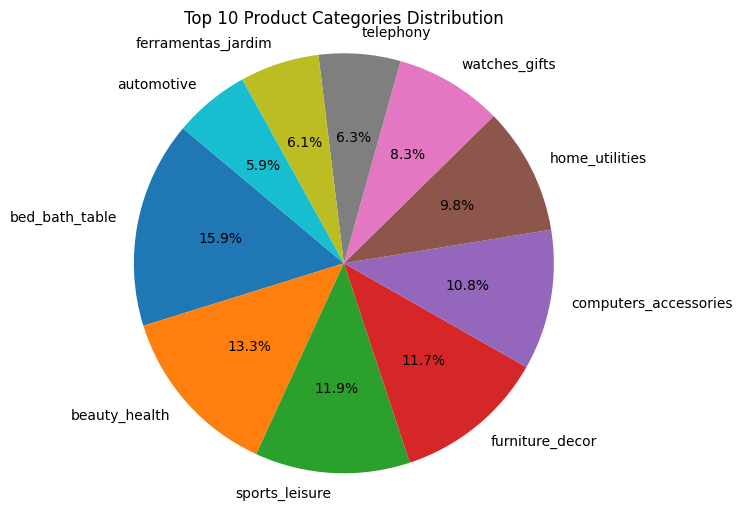

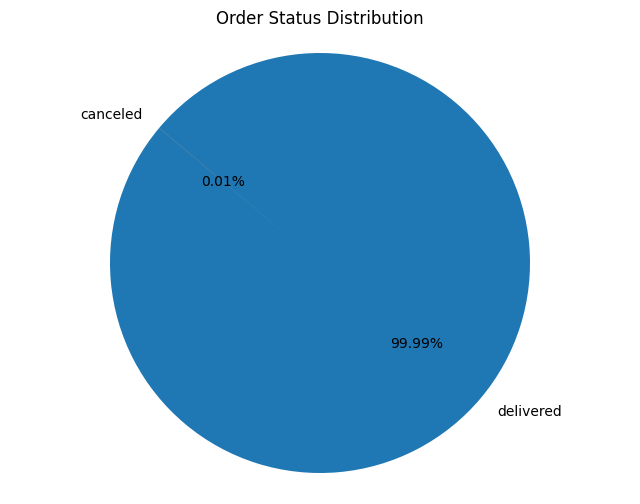

In [24]:
import matplotlib.pyplot as plt

# Assuming you already have the following variables
# payment_type_counts = cleaned_df['payment_type'].value_counts()
# product_category_counts = cleaned_df['product_category_name'].value_counts()

# Pie chart for payment types
plt.figure(figsize=(8, 6))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

# Pie chart for product categories (limiting to top 10 categories for readability)
top_10_product_category_counts = product_category_counts.nlargest(10)

plt.figure(figsize=(8, 6))
plt.pie(top_10_product_category_counts, labels=top_10_product_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Product Categories Distribution')
plt.axis('equal')
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Order Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


In [26]:
cleaned_df['order_purchase_timestamp'] = pd.to_datetime(cleaned_df['order_purchase_timestamp'])

# Calculate the date of the most recent order in the dataset
max_order_date = cleaned_df['order_purchase_timestamp'].max()

# Grouping by customer to calculate RFM metrics
rfm_df = cleaned_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (max_order_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary
}).reset_index()

# Rename the columns for better clarity
rfm_df.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary']

# Display the resulting RFM table
print(rfm_df.head(10))

                 customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19
2  0000f46a3911fa3c0805444483337064      536          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      287          1    196.89
5  0004bd2a26a76fe21f786e4fbd80607f      145          1    166.98
6  00050ab1314c0e55a6ca13cf7181fecf      131          1     35.38
7  00053a61a98854899e70ed204dd4bafe      182          2    838.36
8  0005e1862207bf6ccc02e4228effd9a0      542          1    150.12
9  0005ef4cd20d2893f0d9fbd94d3c0d97      169          1    129.76


In [27]:
# Define quantiles for RFM scoring
quantiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.2, 0.4, 0.6, 0.8])


# Scoring function for Recency, Frequency, and Monetary
def rfm_score(x, metric, quantiles):
    if x <= quantiles[metric][0.2]:
        return 5
    elif x <= quantiles[metric][0.4]:
        return 4
    elif x <= quantiles[metric][0.6]:
        return 3
    elif x <= quantiles[metric][0.8]:
        return 2
    else:
        return 1

# Apply scoring
rfm_df['R_Score'] = rfm_df['Recency'].apply(rfm_score, args=('Recency', quantiles))
rfm_df['F_Score'] = rfm_df['Frequency'].apply(rfm_score, args=('Frequency', quantiles))
rfm_df['M_Score'] = rfm_df['Monetary'].apply(rfm_score, args=('Monetary', quantiles))

# Combine RFM scores to create a composite score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)
print(rfm_df.head(10))


                 customer_unique_id  Recency  Frequency  Monetary  R_Score  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90        4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19        4   
2  0000f46a3911fa3c0805444483337064      536          1     86.22        1   
3  0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62        2   
4  0004aac84e0df4da2b147fca70cf8255      287          1    196.89        2   
5  0004bd2a26a76fe21f786e4fbd80607f      145          1    166.98        4   
6  00050ab1314c0e55a6ca13cf7181fecf      131          1     35.38        4   
7  00053a61a98854899e70ed204dd4bafe      182          2    838.36        3   
8  0005e1862207bf6ccc02e4228effd9a0      542          1    150.12        1   
9  0005ef4cd20d2893f0d9fbd94d3c0d97      169          1    129.76        4   

   F_Score  M_Score RFM_Score  
0        5        2       452  
1        5        5       455  
2        5        4       154  
3        5   

In [28]:
# Sorting by Frequency and Monetary scores first, then Recency (descending order of value)
top_customers = rfm_df.sort_values(by=['F_Score', 'M_Score', 'R_Score'], ascending=[False, False, False])

# Display the top 10 valuable customers
print(top_customers.head(10))


                   customer_unique_id  Recency  Frequency  Monetary  R_Score  \
20   000ec5bff359e1c0ad76a81a45cb598f        8          1     27.75        5   
37   00196c4c9a3af7dd2ad10eade69c926f       32          1     37.58        5   
110  0045e9ad4d6c85d2323a7ab374b76183       70          1     24.13        5   
114  0048a779a98a7848514096ff04046079       21          1     41.04        5   
118  0049ec2d7a5818d0e4b3f4735cec2458       41          1     44.18        5   
157  0065f7795a38381973a373c8b4939679       52          1     31.22        5   
171  00705dcbc0b9cad67abd658612770905       18          1     47.93        5   
235  00a089b8c7ab1e3808c3ad7de7a254dd       70          1     42.47        5   
264  00b246520d4904724f9b20188a2ff39b       88          1     35.05        5   
302  00cc0061269a99836cf8b029b1d0177d       29          1     41.64        5   

     F_Score  M_Score RFM_Score  
20         5        5       555  
37         5        5       555  
110        5     

In [31]:
# Prioritize Recency, then Frequency, then Monetary
recent_high_spenders = rfm_df.sort_values(by=['R_Score', 'F_Score', 'M_Score'], ascending=[False, False, False])

# Display the top 10 recent high-spenders
print(recent_high_spenders.head(10))


20     000ec5bff359e1c0ad76a81a45cb598f
37     00196c4c9a3af7dd2ad10eade69c926f
110    0045e9ad4d6c85d2323a7ab374b76183
114    0048a779a98a7848514096ff04046079
118    0049ec2d7a5818d0e4b3f4735cec2458
157    0065f7795a38381973a373c8b4939679
171    00705dcbc0b9cad67abd658612770905
235    00a089b8c7ab1e3808c3ad7de7a254dd
264    00b246520d4904724f9b20188a2ff39b
302    00cc0061269a99836cf8b029b1d0177d
Name: customer_unique_id, dtype: object


In [33]:
#Both seems to be 
print(top_customers.head(10)['customer_unique_id'])
print(recent_high_spenders.head(10)['customer_unique_id'])

20     000ec5bff359e1c0ad76a81a45cb598f
37     00196c4c9a3af7dd2ad10eade69c926f
110    0045e9ad4d6c85d2323a7ab374b76183
114    0048a779a98a7848514096ff04046079
118    0049ec2d7a5818d0e4b3f4735cec2458
157    0065f7795a38381973a373c8b4939679
171    00705dcbc0b9cad67abd658612770905
235    00a089b8c7ab1e3808c3ad7de7a254dd
264    00b246520d4904724f9b20188a2ff39b
302    00cc0061269a99836cf8b029b1d0177d
Name: customer_unique_id, dtype: object
20     000ec5bff359e1c0ad76a81a45cb598f
37     00196c4c9a3af7dd2ad10eade69c926f
110    0045e9ad4d6c85d2323a7ab374b76183
114    0048a779a98a7848514096ff04046079
118    0049ec2d7a5818d0e4b3f4735cec2458
157    0065f7795a38381973a373c8b4939679
171    00705dcbc0b9cad67abd658612770905
235    00a089b8c7ab1e3808c3ad7de7a254dd
264    00b246520d4904724f9b20188a2ff39b
302    00cc0061269a99836cf8b029b1d0177d
Name: customer_unique_id, dtype: object


In [34]:
comparison_result = top_customers.head(10)['customer_unique_id'] == recent_high_spenders.head(10)['customer_unique_id']

In [35]:
print(comparison_result)

20     True
37     True
110    True
114    True
118    True
157    True
171    True
235    True
264    True
302    True
Name: customer_unique_id, dtype: bool


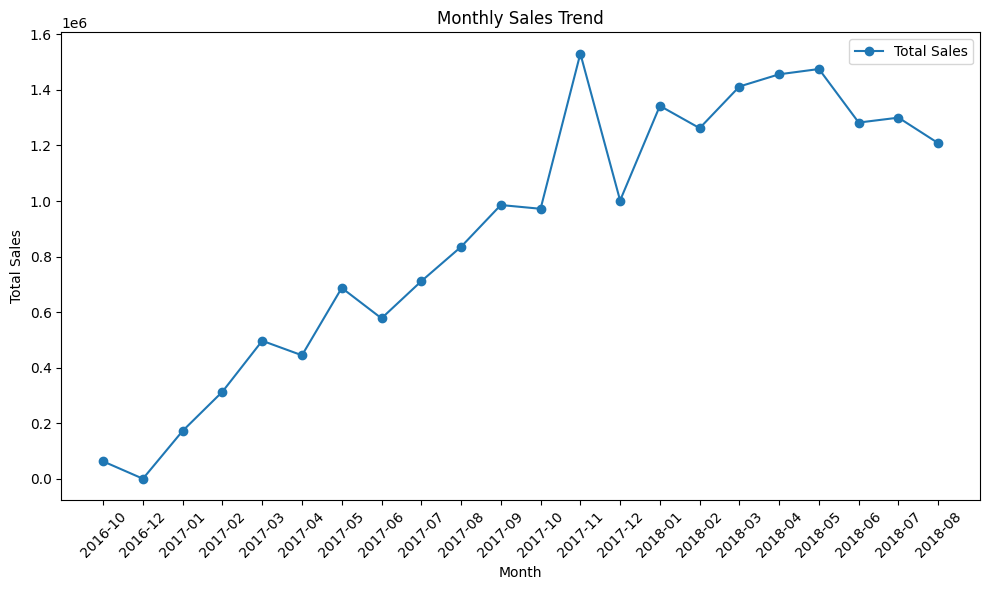

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert order_purchase_timestamp to datetime (if not already converted)
cleaned_df['order_purchase_timestamp'] = pd.to_datetime(cleaned_df['order_purchase_timestamp'])

# Create new columns for both month and week
cleaned_df['order_month'] = cleaned_df['order_purchase_timestamp'].dt.to_period('M')
cleaned_df['order_week'] = cleaned_df['order_purchase_timestamp'].dt.to_period('W')

# Aggregating sales by month
monthly_sales = cleaned_df.groupby('order_month').agg({
    'payment_value': 'sum',  # Total sales
    'order_id': 'count'      # Number of orders
}).reset_index()

# Aggregating sales by week
weekly_sales = cleaned_df.groupby('order_week').agg({
    'payment_value': 'sum',  # Total sales
    'order_id': 'count'      # Number of orders
}).reset_index()

# Plotting the monthly sales trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['order_month'].astype(str), monthly_sales['payment_value'], marker='o', label='Total Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


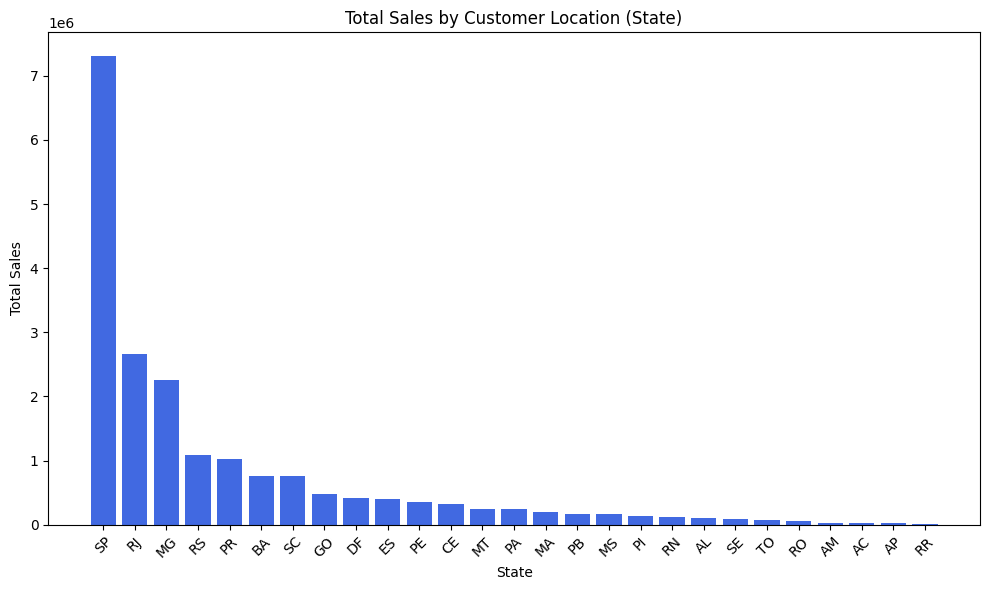

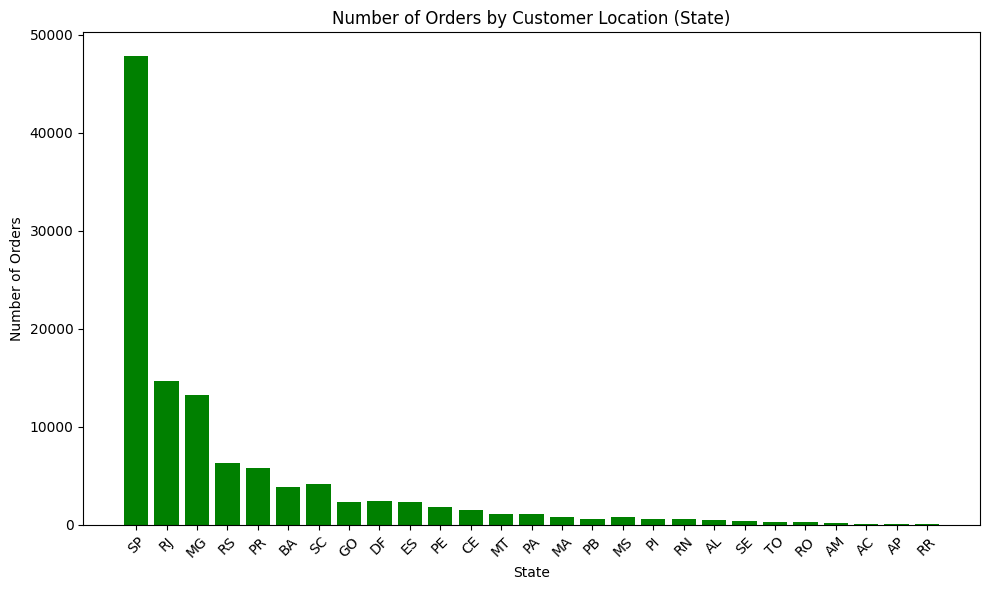

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregating sales and order data by customer state
location_sales = cleaned_df.groupby('customer_state').agg({
    'payment_value': 'sum',  # Total sales
    'order_id': 'count'      # Number of orders
}).reset_index()

# Sorting the data by total sales for better visualization
location_sales = location_sales.sort_values(by='payment_value', ascending=False)

# Plotting the total sales by customer state
plt.figure(figsize=(10, 6))
plt.bar(location_sales['customer_state'], location_sales['payment_value'], color='royalblue')
plt.title('Total Sales by Customer Location (State)')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the number of orders by customer state
plt.figure(figsize=(10, 6))
plt.bar(location_sales['customer_state'], location_sales['order_id'], color='green')
plt.title('Number of Orders by Customer Location (State)')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


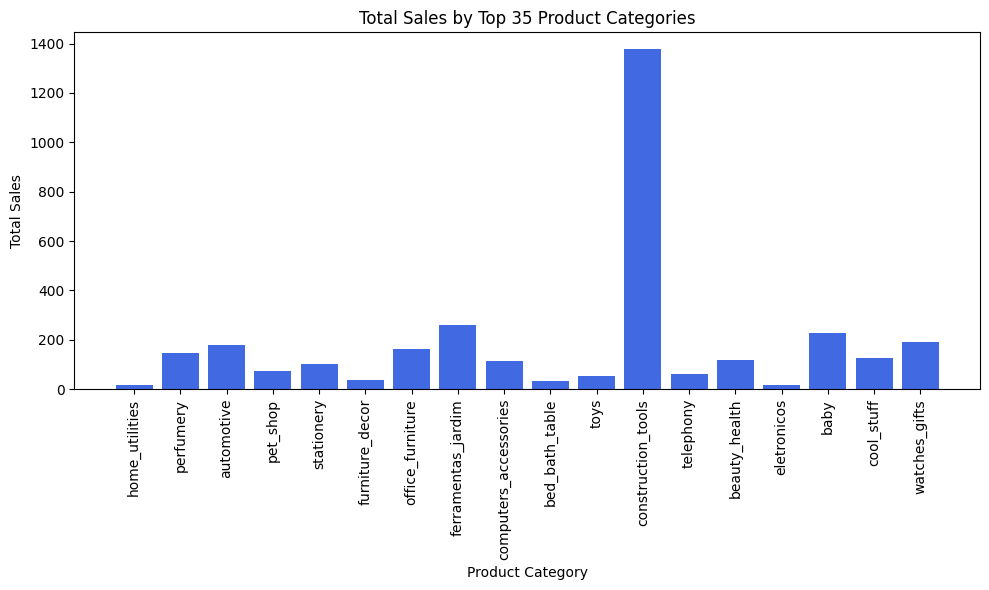

In [42]:
import matplotlib.pyplot as plt

# Limiting the analysis to the top 35 product categories by total sales
top_35_product_performance = cleaned_df.head(35)

# Plotting the total sales by top 35 product categories
plt.figure(figsize=(10, 6))
plt.bar(top_35_product_performance['product_category_name'], top_35_product_performance['payment_value'], color='royalblue')
plt.title('Total Sales by Top 35 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




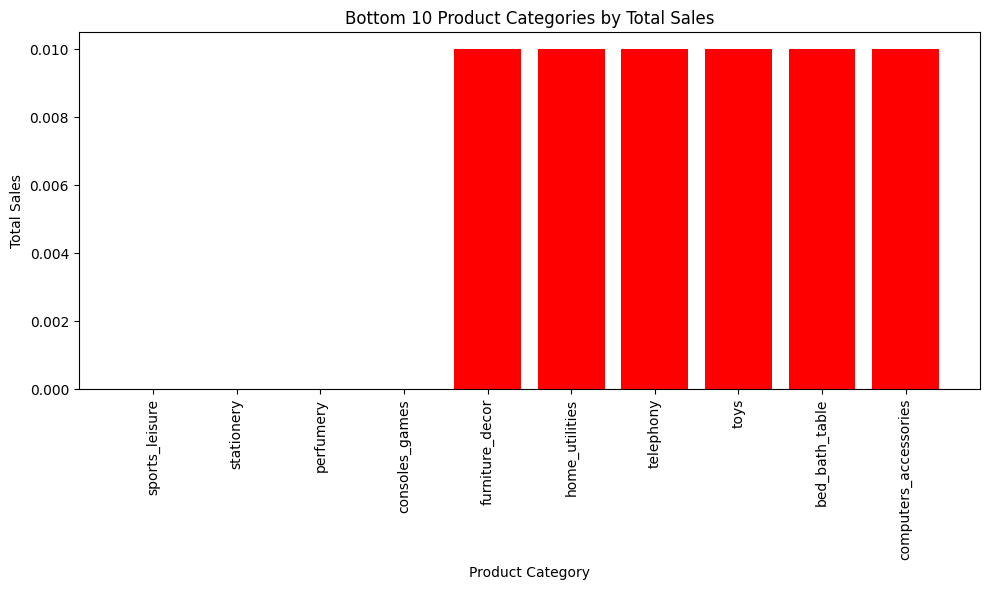

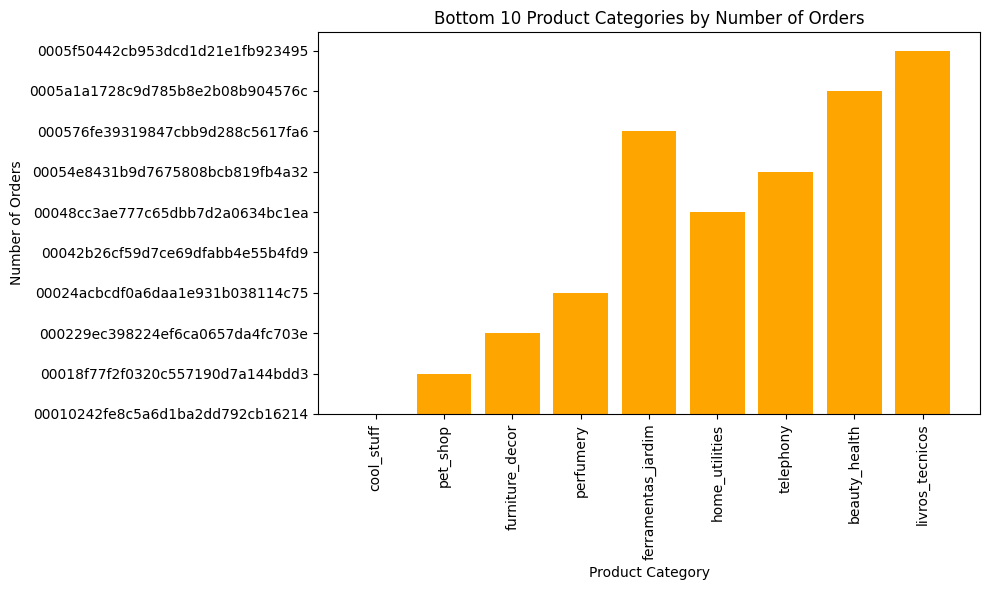

In [46]:
## **************dont like this
import matplotlib.pyplot as plt

# Finding underperforming categories: the bottom 10 in terms of total sales, number of orders, and AOV

# Bottom 10 by total sales
bottom_10_sales = cleaned_df.sort_values(by='payment_value').head(10)

# Bottom 10 by number of orders
bottom_10_orders = cleaned_df.sort_values(by='order_id').head(10)

# Plotting the bottom 10 product categories by total sales
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_sales['product_category_name'], bottom_10_sales['payment_value'], color='red')
plt.title('Bottom 10 Product Categories by Total Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting the bottom 10 product categories by number of orders
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_orders['product_category_name'], bottom_10_orders['order_id'], color='orange')
plt.title('Bottom 10 Product Categories by Number of Orders')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [47]:
# Aggregating sales data by customer state and product category
state_category_performance = cleaned_df.groupby(['customer_state', 'product_category_name']).agg({
    'payment_value': 'sum',  # Total sales
    'order_id': 'count'      # Number of orders
}).reset_index()

# Sorting the result for better visualization
state_category_performance = state_category_performance.sort_values(by='payment_value', ascending=False)


In [48]:
print(state_category_performance)

     customer_state  product_category_name  payment_value  order_id
1262             SP         bed_bath_table      756727.97      5491
1270             SP  computers_accessories      622212.26      3164
1261             SP          beauty_health      604699.12      4247
1292             SP        furniture_decor      533514.77      3668
1317             SP         sports_leisure      508950.16      3718
...             ...                    ...            ...       ...
138              BA        casa_conforto_2          29.69         1
382              GO           dvds_blu_ray          28.01         1
313              ES        casa_conforto_2          28.00         1
856              PR        casa_conforto_2          28.00         1
588              MS                  tools          26.12         1

[1362 rows x 4 columns]


In [64]:
product_sales = cleaned_df.groupby('product_id').agg({
    'payment_value': 'sum',   # Total revenue
    'order_item_id': 'count',  # Quantity sold (assuming each row is one item)
}).rename(columns={'payment_value': 'Total_Sales', 'order_item_id': 'Quantity_Sold'})

# Step 2: Merge with product details to get product names and categories (if available)
product_performance = pd.merge(product_sales, cleaned_df[['product_id', 'product_category_name']].drop_duplicates(), on='product_id', how='left')

# Step 3: Calculate the average price per product
product_performance['Average_Price'] = product_performance['Total_Sales'] / product_performance['Quantity_Sold']

# Step 4: Rank products by Total Sales and Quantity Sold
product_performance['Sales_Rank'] = product_performance['Total_Sales'].rank(ascending=False)
product_performance['Quantity_Rank'] = product_performance['Quantity_Sold'].rank(ascending=False)

# Step 5: Group by product category to analyze category performance
category_performance = product_performance.groupby('product_category_name').agg({
    'Total_Sales': 'sum',
    'Quantity_Sold': 'sum'
}).sort_values(by='Total_Sales', ascending=False)

# Display the top 10 performing products and categories
top_products = product_performance.sort_values(by='Total_Sales', ascending=False).head(10)
top_categories = category_performance.head(10)

top_products, top_categories

(                             product_id  Total_Sales  Quantity_Sold  \
 10888  5769ef0a239114ac3a854af00df129e4    109312.64              8   
 23123  bb50f2e236e5eea0100680137654686c     81539.35            208   
 8277   422879e10f46682990de24d770e7f83d     79512.22            505   
 25959  d1c427060a0f73f6b889a5c7c61f2ac4     68038.66            346   
 26446  d5991653e037ccb7af6ed7d94246b249     64143.26            106   
 13499  6cdd53843498f92890544667809f1595     63665.41            156   
 21240  aca2eb7d00ea1a7b8ebd4e68314663af     62975.07            529   
 20456  a62e25e09e05e6faf31d90c6ec1aa3d1     62911.77            226   
 18950  99a4788cb24856965c36a24e339b6058     61997.30            513   
 7739   3dd2a17168ec895c781a9191c1e95ad7     58625.98            276   
 
        product_category_name  Average_Price  Sales_Rank  Quantity_Rank  
 10888        landline_phones   13664.080000         1.0         2513.5  
 23123          beauty_health     392.016106         2.0  

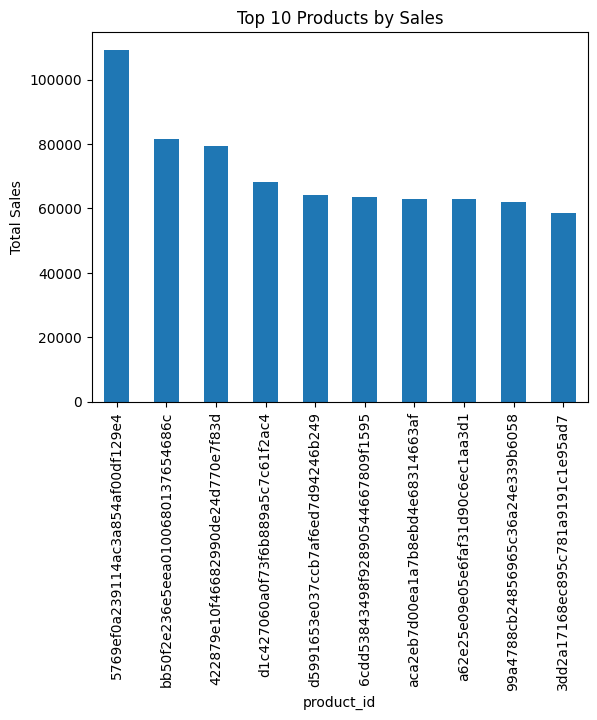

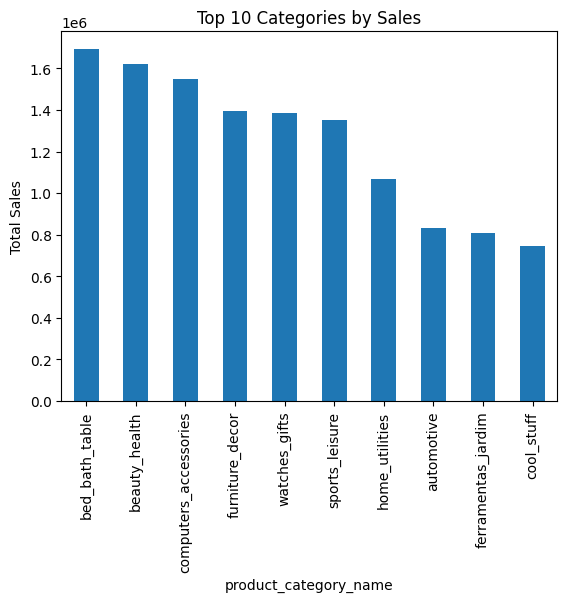

In [30]:
import matplotlib.pyplot as plt

# Plot top 10 products by sales
top_products.plot(x='product_id', y='Total_Sales', kind='bar', title='Top 10 Products by Sales', legend=False)
plt.ylabel('Total Sales')
plt.show()

# Plot top 10 categories by sales
top_categories.plot(y='Total_Sales', kind='bar', title='Top 10 Categories by Sales', legend=False)
plt.ylabel('Total Sales')
plt.show()

In [31]:
import pandas as pd
from datetime import datetime

# Step 1: Calculate RFM metrics
# Convert the 'order_purchase_timestamp' to datetime
cleaned_df['order_purchase_timestamp'] = pd.to_datetime(cleaned_df['order_purchase_timestamp'])

# Set the analysis date as the day after the last purchase
analysis_date = cleaned_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Group by customer and calculate Recency, Frequency, and Monetary values
rfm_df = cleaned_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (analysis_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency (number of orders)
    'payment_value': 'sum'  # Monetary (total spend)
})

# Rename columns
rfm_df.rename(columns={'order_purchase_timestamp': 'Recency', 'order_id': 'Frequency', 'payment_value': 'Monetary'}, inplace=True)

# Step 2: Normalize RFM values (Standard Scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# Convert the scaled values back to a DataFrame for easier interpretation
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'], index=rfm_df.index)

# Step 3: Apply K-Means Clustering
from sklearn.cluster import KMeans

# Set the number of clusters (k) - you can adjust this value based on your dataset
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

# Step 4: Visualize the clusters
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn pairplot to visualize the clusters in 2D space
sns.pairplot(rfm_df, hue='Cluster', palette='Set1', diag_kind='kde')
plt.show()

# Optional: Plot each RFM dimension in 3D for better understanding
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each customer with Recency, Frequency, and Monetary values in 3D
ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'], c=rfm_df['Cluster'], cmap='Set1', s=50)

# Label axes
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM Clustering - 3D Visualization')
plt.show()


ModuleNotFoundError: No module named 'sklearn'

In [4]:
# RFM Analysis
rfm = orders_cleaned.groupby('customer_id').agg({
    'order_id': 'count',               # Frequency
    'order_purchase_timestamp': 'max',  # Recency
    'payment_value': 'sum'              # Monetary value
}).reset_index()

# Convert recency to days
import datetime as dt
rfm['recency'] = (dt.datetime.now() - pd.to_datetime(rfm['order_purchase_timestamp'])).dt.days

# Drop the 'order_purchase_timestamp' column
rfm = rfm.drop('order_purchase_timestamp', axis=1)

# Rename columns
rfm.columns = ['customer_id', 'frequency', 'recency', 'monetary']

# Display RFM metrics
print(rfm.head())


                        customer_id  frequency  recency  monetary
0  00012a2ce6f8dcda20d059ce98491703          1   114.74      2500
1  000161a058600d5901f007fab4c27140          1    67.41      2622
2  0001fd6190edaaf884bcaf3d49edf079          1   195.42      2760
3  0002414f95344307404f0ace7a26f1d5          1   179.35      2590
4  000379cdec625522490c315e70c7a9fb          1   107.01      2361


In [5]:
# Define churn threshold (e.g., customers who haven't purchased in the last 180 days)
churn_threshold = 180
rfm['churn'] = rfm['recency'].apply(lambda x: 1 if x > churn_threshold else 0)

# Display churn prediction results
print(rfm[['customer_id', 'recency', 'churn']].head())


                        customer_id  recency  churn
0  00012a2ce6f8dcda20d059ce98491703   114.74      0
1  000161a058600d5901f007fab4c27140    67.41      0
2  0001fd6190edaaf884bcaf3d49edf079   195.42      1
3  0002414f95344307404f0ace7a26f1d5   179.35      0
4  000379cdec625522490c315e70c7a9fb   107.01      0


In [6]:
# Group by customer state and product category to analyze biases
state_product_analysis = orders_cleaned.groupby(['customer_state', 'product_category_name'])['order_id'].count().unstack()

# Display the analysis
print(state_product_analysis)


product_category_name  agro_industria_e_comercio  alimentos  \
customer_state                                                
AC                                           NaN        NaN   
AL                                           1.0        1.0   
AM                                           NaN        1.0   
AP                                           1.0        NaN   
BA                                           5.0       15.0   
CE                                           6.0        5.0   
DF                                           NaN        9.0   
ES                                           2.0       13.0   
GO                                           5.0        7.0   
MA                                           NaN        NaN   
MG                                          22.0       38.0   
MS                                           3.0        4.0   
MT                                           2.0        7.0   
PA                                           2.0       

In [7]:
# Cross-Selling Analysis: Find common product pairings within the same order
cross_sell_analysis = orders_cleaned.groupby('order_id')['product_category_name'].apply(lambda x: ', '.join(x.unique())).reset_index()

# Display the most common product pairings
print(cross_sell_analysis['product_category_name'].value_counts().head(10))


product_category_name
cama_mesa_banho           9074
beleza_saude              8578
esporte_lazer             7461
informatica_acessorios    6479
moveis_decoracao          6101
utilidades_domesticas     5641
relogios_presentes        5453
telefonia                 4065
automotivo                3774
brinquedos                3754
Name: count, dtype: int64


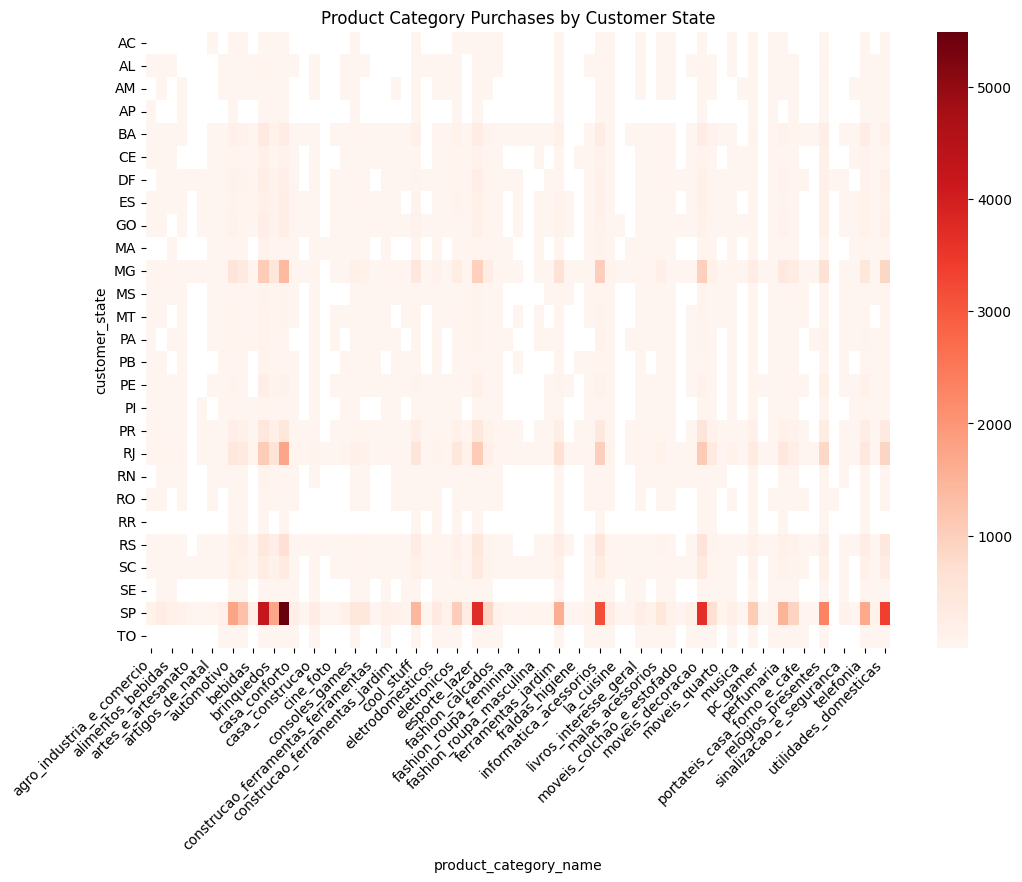

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap to visualize product purchases by state and category
plt.figure(figsize=(12, 8))
sns.heatmap(state_product_analysis, cmap='Reds', annot=False)

# Rotate the x-axis labels (product_category_name)
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees and align to the right

# Rotate the y-axis labels (customer_state)
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

plt.title('Product Category Purchases by Customer State')
plt.show()


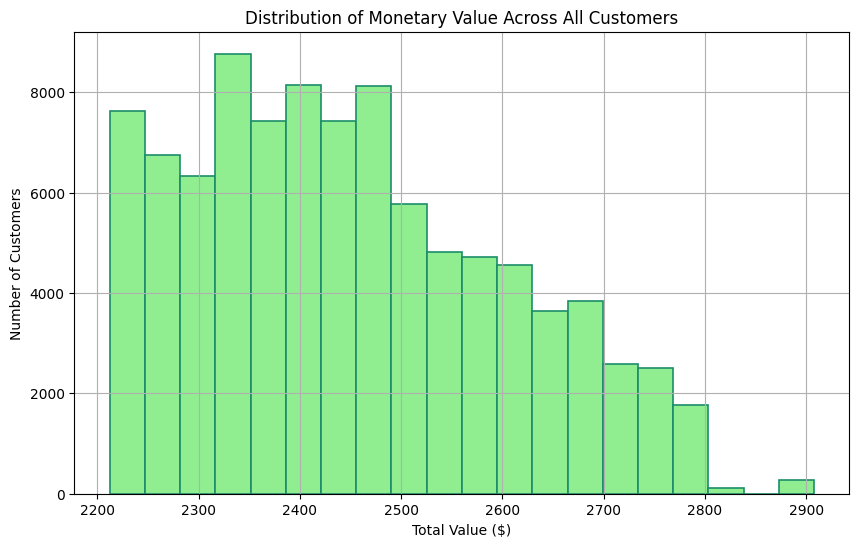

In [23]:
# Distribution plot (histogram) of monetary values for all customers
plt.figure(figsize=(10, 6))
rfm['monetary'].hist(bins=20, color='lightgreen', edgecolor='#1B8D69', linewidth=1.2)

plt.title('Distribution of Monetary Value Across All Customers')
plt.ylabel('Number of Customers')
plt.xlabel('Total Value ($)')
plt.show()


In [21]:
# Define churn threshold (e.g., customers who haven't purchased in the last 180 days)
churn_threshold = 180
rfm['churn'] = rfm['recency'].apply(lambda x: 1 if x > churn_threshold else 0)

# Display churn prediction results
print(rfm[['customer_id', 'recency', 'churn']].head())


                        customer_id  recency  churn
0  00012a2ce6f8dcda20d059ce98491703   114.74      0
1  000161a058600d5901f007fab4c27140    67.41      0
2  0001fd6190edaaf884bcaf3d49edf079   195.42      1
3  0002414f95344307404f0ace7a26f1d5   179.35      0
4  000379cdec625522490c315e70c7a9fb   107.01      0


Overall Churn Rate: 28.07%


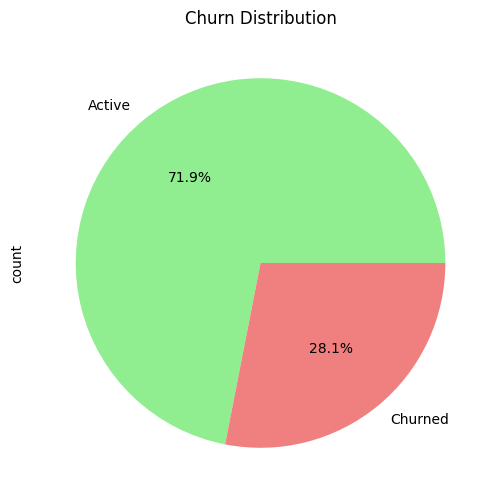

In [22]:
# Calculate the percentage of churned customers
churn_rate = rfm['churn'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

# Visualize churn distribution
plt.figure(figsize=(6, 6))
rfm['churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], labels=['Active', 'Churned'])
plt.title('Churn Distribution')
plt.show()


segment
Low          28.288153
Medium       28.156401
High         28.290361
Very High    27.557693
Name: churn, dtype: float64


/var/folders/t4/qp2gj83d0kn0v_lrjyw45pyc0000gn/T/ipykernel_1153/1156655897.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_segment = rfm.groupby('segment')['churn'].mean() * 100


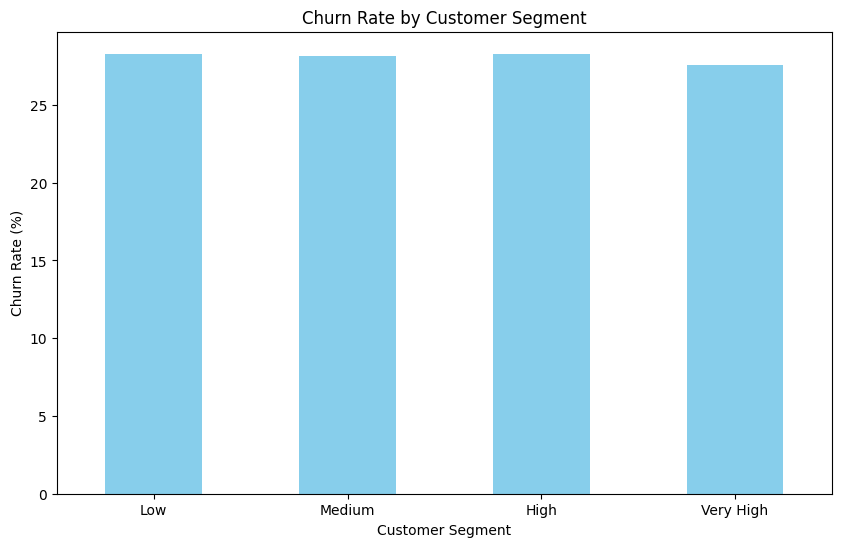

In [24]:
# Create customer segments based on monetary value (low, medium, high, very high)
rfm['segment'] = pd.qcut(rfm['monetary'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Analyze churn by customer segment
churn_by_segment = rfm.groupby('segment')['churn'].mean() * 100
print(churn_by_segment)

# Visualize churn by customer segment
plt.figure(figsize=(10, 6))
churn_by_segment.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Customer Segment')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Customer Segment')
plt.xticks(rotation=0)
plt.show()


In [25]:
# Total number of customers
total_customers = rfm.shape[0]

# Number of churned customers
churned_customers = rfm['churn'].sum()

# Number of active customers
active_customers = total_customers - churned_customers

print(f"Total Customers: {total_customers}")
print(f"Churned Customers: {churned_customers}")
print(f"Active Customers: {active_customers}")


Total Customers: 95128
Churned Customers: 26706
Active Customers: 68422


In [26]:
# Number of customers per segment
customers_by_segment = rfm.groupby('segment')['customer_id'].count()

# Number of churned customers per segment
churned_by_segment = rfm[rfm['churn'] == 1].groupby('segment')['customer_id'].count()

# Print results
print("Customers by Segment:")
print(customers_by_segment)

print("\nChurned Customers by Segment:")
print(churned_by_segment)


Customers by Segment:
segment
Low          23904
Medium       23785
High         23736
Very High    23703
Name: customer_id, dtype: int64

Churned Customers by Segment:
segment
Low          6762
Medium       6697
High         6715
Very High    6532
Name: customer_id, dtype: int64


/var/folders/t4/qp2gj83d0kn0v_lrjyw45pyc0000gn/T/ipykernel_1153/2322986466.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customers_by_segment = rfm.groupby('segment')['customer_id'].count()
/var/folders/t4/qp2gj83d0kn0v_lrjyw45pyc0000gn/T/ipykernel_1153/2322986466.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned_by_segment = rfm[rfm['churn'] == 1].groupby('segment')['customer_id'].count()


In [27]:
# Total revenue by segment
revenue_by_segment = rfm.groupby('segment')['monetary'].sum()

# Print results
print("Revenue by Segment:")
print(revenue_by_segment)


Revenue by Segment:
segment
Low          54266432
Medium       56603763
High         59136514
Very High    63165120
Name: monetary, dtype: int64


/var/folders/t4/qp2gj83d0kn0v_lrjyw45pyc0000gn/T/ipykernel_1153/1706874209.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_segment = rfm.groupby('segment')['monetary'].sum()


In [28]:
# Revenue from churned customers
revenue_lost = rfm[rfm['churn'] == 1]['monetary'].sum()

# Print revenue lost
print(f"Total Revenue Lost Due to Churn: ${revenue_lost:.2f}")


Total Revenue Lost Due to Churn: $65436540.00
